In [27]:
import stockfinder.core as core
import sqlite3
import time
import logging

import importlib
importlib.reload(core)
importlib.reload(logging)

USE_INIT = True

sysdate = time.strftime('%Y%m%d')
print('SYSDATE: [{}]'.format(sysdate))

if USE_INIT:
    core.init_database(True)
    core.fill_calendar('2018')
    core.fill_krx_base(core.MARKET_KOSPI)
    core.fill_krx_base(core.MARKET_KOSDAQ)

with core.DBConn() as conn:
    cur = conn.cursor()
    cur.execute('''select *
                     from calendar
                    where work = 'Y'
                      and date < ?
                   order by date desc
                   ''', (sysdate, ))
    dates = []
    for d in cur:    
        dates.append(d[0])
    cur.close()

for date in dates:
    try:
        core.fill_krx_rank(date)
    except:
        break

core.fill_indices()

print('Complete')
conn.close()

SYSDATE: [20180924]
FILL CALENDAR. YEAR: 2018, ELAPSED: 0.034
FILL KRX BASE. MARKET: 1, ELAPSED: 0.071
FILL KRX BASE. MARKET: 2, ELAPSED: 0.118
FILL KRX RANK. DATE: 20180921, ELAPSED: 0.465
FILL KRX RANK. DATE: 20180920, ELAPSED: 0.463
FILL KRX RANK. DATE: 20180919, ELAPSED: 0.470
FILL KRX RANK. DATE: 20180918, ELAPSED: 0.483
FILL KRX RANK. DATE: 20180917, ELAPSED: 0.468
FILL KRX RANK. DATE: 20180914, ELAPSED: 0.440
FILL KRX RANK. DATE: 20180913, ELAPSED: 0.461
FILL KRX RANK. DATE: 20180912, ELAPSED: 0.440
FILL KRX RANK. DATE: 20180911, ELAPSED: 0.444
FILL KRX RANK. DATE: 20180910, ELAPSED: 0.547
FILL KRX RANK. DATE: 20180907, ELAPSED: 0.675
FILL KRX RANK. DATE: 20180906, ELAPSED: 0.609
FILL KRX RANK. DATE: 20180905, ELAPSED: 0.707
FILL KRX RANK. DATE: 20180904, ELAPSED: 0.688
FILL KRX RANK. DATE: 20180903, ELAPSED: 0.619
FILL KRX RANK. DATE: 20180831, ELAPSED: 0.535
FILL KRX RANK. DATE: 20180830, ELAPSED: 0.695
FILL KRX RANK. DATE: 20180829, ELAPSED: 0.670
FILL KRX RANK. DATE: 2018082

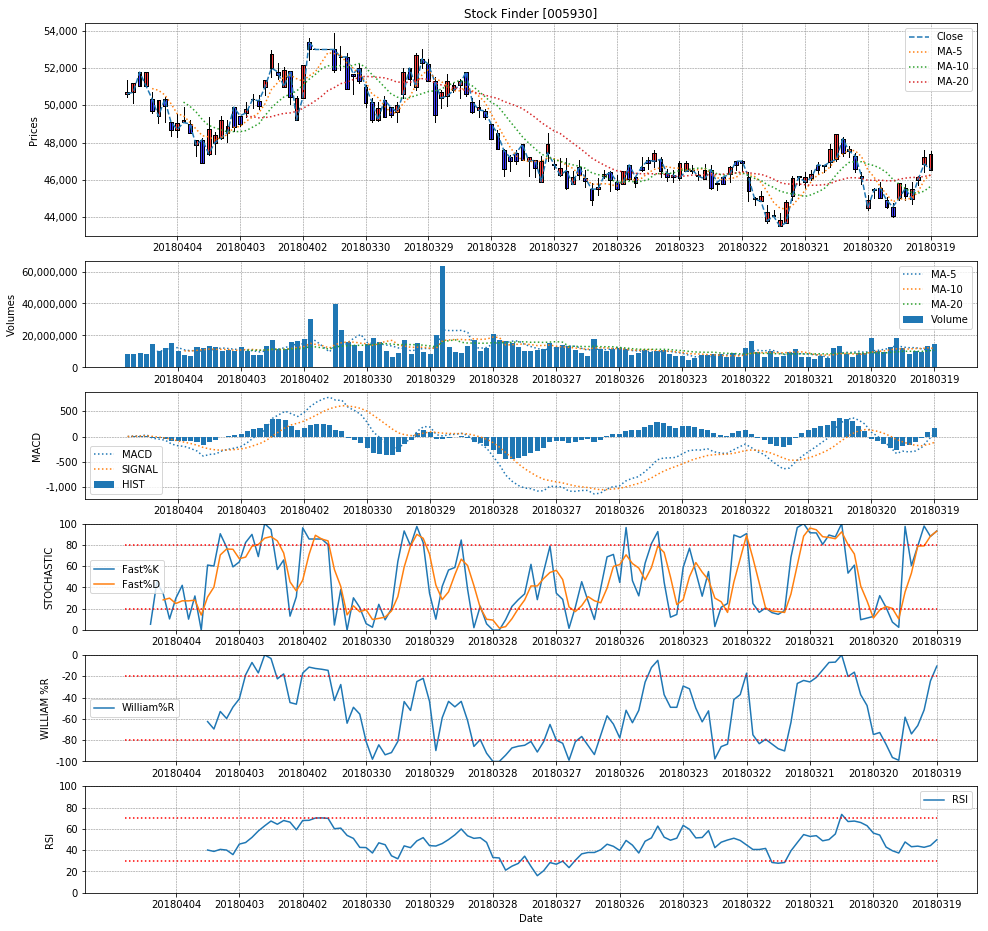

In [28]:
import stockfinder.core as core
import stockfinder.chart as chart
import matplotlib.pyplot as plt
import sqlite3
import time

import importlib
importlib.reload(core)
importlib.reload(chart)

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 16)
chart.draw_basic_chart('005930')
plt.show()